<a href="https://colab.research.google.com/github/AlexNedyalkov/Washington-University-Application-Neural-Networks/blob/master/Module_4_3_Practice_Regression_with_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [0]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values=["?", "NA"])

In [5]:
df.head()

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [6]:
df.shape

(2000, 14)

In [0]:
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

In [0]:
df = pd.concat([df, pd.get_dummies(df.area, prefix = "area")], axis = 1)
df.drop("area", axis = 1, inplace = True)

In [0]:
# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

In [11]:
df.shape

(2000, 55)

In [0]:
# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

In [13]:
df.isna().sum()

id                0
income            0
aspect            0
subscriptions     0
dist_healthy      0
save_rate         0
dist_unhealthy    0
age               0
pop_dense         0
retail_dense      0
crime             0
job_11            0
job_al            0
job_am            0
job_ax            0
job_bf            0
job_by            0
job_cv            0
job_de            0
job_dz            0
job_e2            0
job_f8            0
job_gj            0
job_gv            0
job_kd            0
job_ke            0
job_kl            0
job_kp            0
job_ks            0
job_kw            0
job_mm            0
job_nb            0
job_nn            0
job_ob            0
job_pe            0
job_po            0
job_pq            0
job_pz            0
job_qp            0
job_qw            0
job_rn            0
job_sa            0
job_vv            0
job_zz            0
area_a            0
area_b            0
area_c            0
area_d            0
product_a         0
product_b         0


In [0]:
# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

In [0]:
# Convert to numpy - Classification
x_columns = df.columns.drop("age").drop("id")
x = df[x_columns].values
y = df["age"].values


In [0]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [21]:
y_test

array([50, 36, 48, 48, 45, 44, 45, 43, 47, 49, 42, 50, 48, 49, 48, 48, 41,
       43, 45, 47, 50, 50, 46, 36, 36, 32, 49, 40, 47, 49, 45, 46, 50, 49,
       49, 41, 40, 49, 49, 50, 47, 48, 50, 48, 46, 44, 48, 48, 47, 37, 46,
       45, 46, 42, 48, 50, 48, 39, 48, 49, 47, 47, 45, 44, 46, 49, 48, 39,
       44, 47, 49, 41, 51, 39, 45, 48, 44, 49, 49, 47, 47, 39, 49, 41, 48,
       50, 47, 49, 48, 45, 43, 48, 43, 47, 49, 46, 50, 51, 49, 46, 50, 46,
       43, 46, 50, 47, 41, 46, 47, 48, 44, 45, 49, 47, 46, 47, 48, 41, 45,
       47, 49, 41, 45, 43, 45, 39, 50, 45, 49, 49, 49, 49, 40, 48, 50, 51,
       46, 47, 45, 43, 50, 49, 47, 49, 48, 47, 46, 45, 48, 47, 39, 47, 39,
       49, 41, 43, 48, 45, 40, 48, 41, 48, 45, 50, 51, 44, 47, 47, 45, 47,
       47, 44, 50, 45, 50, 44, 46, 46, 43, 48, 47, 47, 43, 47, 50, 50, 43,
       43, 45, 50, 41, 36, 44, 49, 50, 41, 44, 47, 47, 47, 46, 46, 32, 50,
       45, 49, 45, 45, 44, 47, 50, 45, 51, 46, 45, 49, 48, 41, 49, 47, 46,
       46, 46, 37, 51, 50

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error

In [18]:
# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 1s - loss: 1935.9205 - val_loss: 1540.0952
Epoch 2/1000
1500/1500 - 0s - loss: 1231.3743 - val_loss: 816.4365
Epoch 3/1000
1500/1500 - 0s - loss: 527.0290 - val_loss: 303.4942
Epoch 4/1000
1500/1500 - 0s - loss: 288.8759 - val_loss: 254.7164
Epoch 5/1000
1500/1500 - 0s - loss: 242.1568 - val_loss: 212.5666
Epoch 6/1000
1500/1500 - 0s - loss: 192.9782 - val_loss: 167.4276
Epoch 7/1000
1500/1500 - 0s - loss: 147.1867 - val_loss: 128.8638
Epoch 8/1000
1500/1500 - 0s - loss: 112.5505 - val_loss: 100.9249
Epoch 9/1000
1500/1500 - 0s - loss: 88.1546 - val_loss: 81.3721
Epoch 10/1000
1500/1500 - 0s - loss: 70.8224 - val_loss: 67.0403
Epoch 11/1000
1500/1500 - 0s - loss: 57.6602 - val_loss: 55.6268
Epoch 12/1000
1500/1500 - 0s - loss: 47.6407 - val_loss: 47.3840
Epoch 13/1000
1500/1500 - 0s - loss: 40.0567 - val_loss: 40.4676
Epoch 14/1000
1500/1500 - 0s - loss: 33.9067 - val_loss: 35.6501
Epoch 15/1000
1500/1500 - 0s - lo

In [19]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.5216943146800405


In [27]:
type(pred)

numpy.ndarray

In [28]:
pred.shape

(500, 1)

In [29]:
type(pred.flatten())

numpy.ndarray

In [30]:
pred.flatten().shape

(500,)

In [20]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7222840955469256


In [0]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

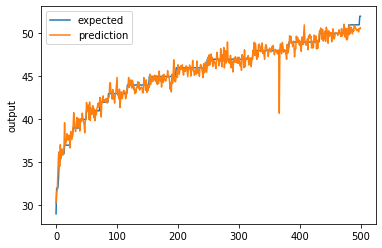

In [26]:
chart_regression(pred.flatten(),y_test)